# text exploration

- statistics
    - length, etc.
- cleaning
- reduce data
    - consider taking only x first sentences
- pca
- stemming
- tokenizing
- implement tf-idf 

In [147]:
# TODO: something about stuff like this: –

In [129]:
import re
import random
import string

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from utils.read_data import read_articles_file

In [130]:
def remove_numbers(string:str) -> str:
    pattern = r'[0-9]'

    # Match all digits in the string and replace them with an empty string
    new_string = re.sub(pattern, '', string)
    return new_string

def clean(text: str) -> str:
    text = remove_numbers(text)
    text = text.translate(str.maketrans('', '', string.punctuation))    # remove punctuation: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    text = text.lower()                                                 # convert to lower case
    return text

In [133]:
article_texts_path = "/work3/s204163/wiki/article_texts"
article_ids_path = "/work3/s204163/wiki/article_ids"

N = 1000
articles = read_articles_file(article_texts_path, return_titles = False)

In [148]:
# TODO: make nicer
def random_articles(articles: set, N:int) -> set:
    arts = {}

    keys = random.sample(list(articles.keys()), N)
    for key in keys:
        arts[key] = clean(articles[key])

    return arts

articles = random_articles(articles, N)
print(len(articles))

1000


In [135]:
# Get corpus as a list of documents
corpus = [0] * N

for i, (id, text) in enumerate(articles.items()):
    corpus[i] = text

# TF-IDF

In [136]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(1000, 2000)


# Clustering

In [137]:
kmeans = KMeans(n_clusters=20, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_
print(labels[:40])

[ 4 17 18 16  6  3  4  4 16  0  6  4 18 16  7  4 18 16 16  5 17  3  8  2
  3 15 16  0  1 14  2  3  6  3  8 16 18  3  4 16]


In [144]:
for i, (text, label) in enumerate(zip(corpus, labels)):
    if label == 0:
        print(text[:200])
        print(" ")

rickey nelson henley henderson born december   is an american retired professional baseball left fielder who played in major league baseball mlb for nine teams from  to  including four separate tenure
 
andre christopher boucaud born  october  is a professional footballer who plays as a midfielder for  club barnet he has played in the football league for peterborough united wycombe wanderers notts co
 
simon james wormull born  december  is an english former footballer who is head coach of isthmian league club three bridges  as a junior wormull played for tottenham hotspur in the final of the  fa yo
 
john michael lewis mousinho born  april  is an english professional footballer who plays as a defender for league one club oxford united  mousinho began his professional football career at brentford h
 
stuart charles tomlinson born  may  is an english former professional wrestler and professional footballer who played as a goalkeeper  as a footballer tomlinson progressed from the crewe a

# PCA

In [139]:
pca = PCA(n_components=2)

X_pca = pca.fit(X.toarray()).transform(X.toarray())

345.8150761950794


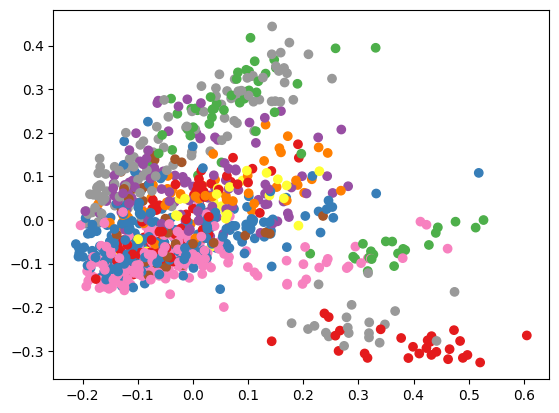

In [142]:
print(kmeans.inertia_) # closer to 0 is better
x, y = X_pca.T
plt.scatter(x, y, c = labels, cmap="Set1")
plt.show()